In [20]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN

In [2]:
# Carregar o conjunto de dados
penguins = sns.load_dataset("penguins")

# Exibir as primeiras linhas do conjunto de dados
print(penguins.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


In [3]:
X = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].dropna()

In [4]:
y = penguins['species']

In [8]:
inertia = []
silhouette_scores = []

K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

/home/aluno/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/aluno/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/aluno/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/aluno/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1

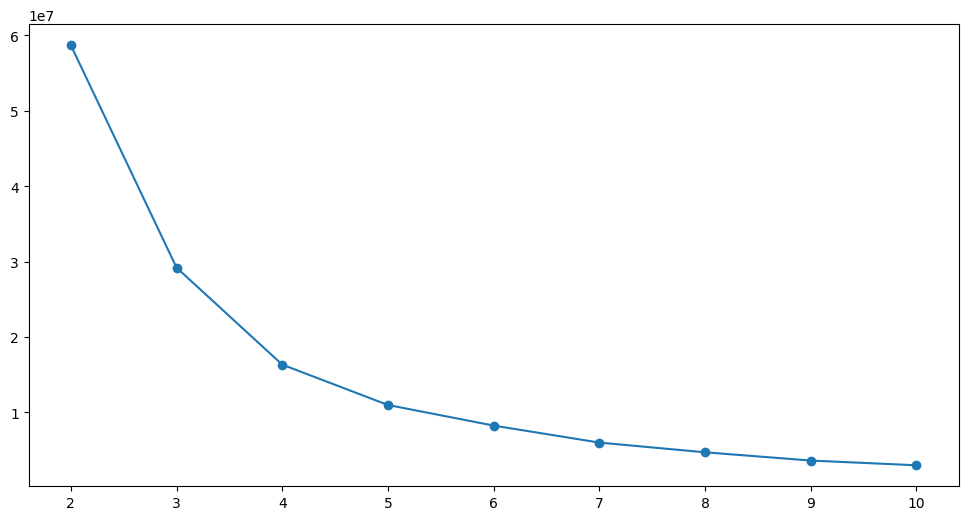

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(K, inertia, marker='o')

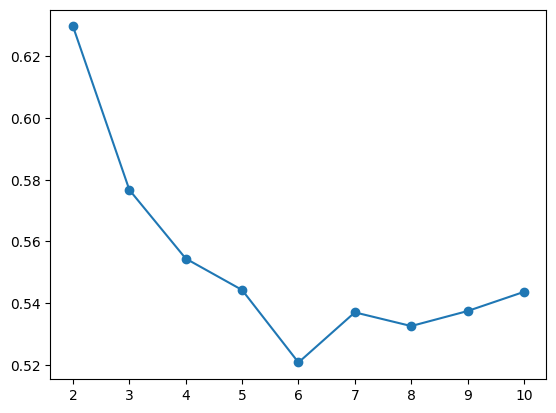

In [13]:
plt.plot(K, silhouette_scores, marker='o')

In [22]:
scalar = StandardScaler()

In [23]:
scalar_caracteristicas = scalar.fit_transform(X)

In [24]:
linked= linkage(scalar_caracteristicas, method = "ward")

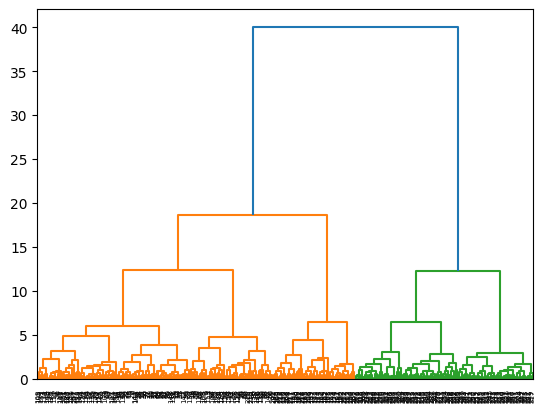

In [30]:
dendrogram(linked,orientation="top",distance_sort='descending')
plt.show()

In [56]:
dbscan = DBSCAN(eps=0.6, min_samples=8)
dbscan_labels = dbscan.fit_predict(scalar_caracteristicas)

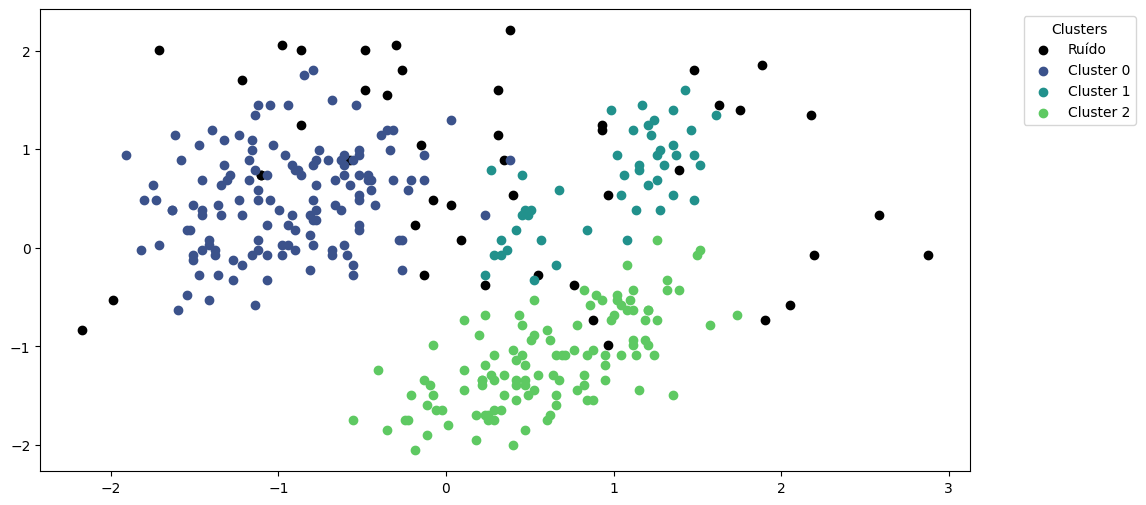

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Plotando os clusters
plt.figure(figsize=(12, 6))

# Listando as cores únicas (clusters) e atribuindo uma cor específica para cada cluster
unique_labels = np.unique(dbscan_labels)

# Para cada cluster, plote os pontos com uma cor distinta
for label in unique_labels:
    # Se o cluster for -1, são pontos de ruído
    if label == -1:
        color = 'black'
        label_name = 'Ruído'
    else:
        color = plt.cm.viridis((label + 1) / (len(unique_labels)))  # Escolher uma cor do cmap
        label_name = f'Cluster {label}'

    # Filtrando os dados pelo rótulo (cluster)
    mask = dbscan_labels == label
    plt.scatter(scalar_caracteristicas[mask, 0], scalar_caracteristicas[mask, 1], 
                color=color, label=label_name, marker='o')


# Adicionando a legenda
plt.legend(title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.show()


In [60]:
pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 3.6 MB/s eta 0:00:007.0 MB/s eta 0:00:01

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
